In [38]:
#install python 3.9
!sudo apt-get update -y
!sudo apt-get install python3.9

#change alternatives
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.7 1
!sudo update-alternatives --install /usr/bin/python3 python3 /usr/bin/python3.9 2

#check python version
!python --version
# returns Python 3.9.13

Hit:1 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [ ]:
import json


with open('/content/wvs_questions.json', 'r') as file:
    data = json.load(file)

# Print the data
print(data)

{'Q1': {'description': 'Important in life: Family', 'questions': ['How would you rate the importance of family in your life?', 'To what extent do you consider family as important in your life?', 'Would you say family holds great importance in your life?', 'Do you perceive family as significant in your life?'], 'options': ['Very important', 'Rather important', 'Not very important', 'Not at all important', "Don't know"]}, 'Q2': {'description': 'Important in life: Friends', 'questions': ['How important are friends in life?', 'In your opinion, how significant are friends in life?', 'To what extent do you consider friends to be important in life?', 'Do you believe friends hold great importance in life?'], 'options': ['Very important', 'Rather important', 'Not very important', 'Not at all important', "Don't know"]}, 'Q3': {'description': 'Important in life: Leisure time', 'questions': ['How important is leisure time in your life?', 'To what extent is leisure time important to you?', 'Would y

In [ ]:
import pandas as pd



rows = []
for key, content in data.items():
    questions = content['questions']
    options = content['options']

    # Convert list to string and strip outer brackets and whitespace
    questions_str = str(questions).strip()[1:-1].strip()
    options_str = str(options).strip()[1:-1].strip()

    rows.append({
        'key': key,
        'description': content['description'],
        'questions': questions_str,
        'options': options_str
    })

# Create DataFrame
wvs_sample_df = pd.DataFrame(rows)



In [ ]:
wvs_sample_df

,key,description,questions,options
0,Q1,Important in life: Family,'How would you rate the importance of family i...,"'Very important', 'Rather important', 'Not ver..."
1,Q2,Important in life: Friends,"'How important are friends in life?', 'In your...","'Very important', 'Rather important', 'Not ver..."
2,Q3,Important in life: Leisure time,"'How important is leisure time in your life?',...","'Very important', 'Rather important', 'Not ver..."
3,Q4,Important in life: Politics,'How would you rate the importance of politics...,"'Very important', 'Rather important', 'Not ver..."
4,Q5,Important in life: Work,"'How important is work in your life?', 'Would ...","'Very important', 'Rather important', 'Not ver..."
...,...,...,...,...
72,Q85,Confidence: International Criminal Court (ICC),'What level of confidence do you have in the I...,"'A great deal', 'Quite a lot', 'Not very much'..."
73,Q86,Confidence: North Atlantic Treaty Organization...,'How much confidence do you have in the North ...,"'A great deal', 'Quite a lot', 'Not very much'..."
74,Q87,Confidence: The World Bank (WB),'How much confidence do you have in the World ...,"'A great deal', 'Quite a lot', 'Not very much'..."
75,Q88,Confidence: The World Health Organization (WHO),'How much confidence do you have in the World ...,"'A great deal', 'Quite a lot', 'Not very much'..."


In [39]:
!pip install  --quiet langgraph
!pip install  --quiet langchain-google-genai
!pip install --quiet langchain
!pip install --quiet tavily-python
!pip install --quiet langchain_community
!pip install --quiet langchain-groq
!pip install --quiet wikipedia
!pip install --quiet google-generativeai
!pip install --quiet duckduckgo-search
!pip install --quiet backoff
!pip install --quiet ratelimit
!pip install --quiet requests



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-generativeai 0.8.4 requires google-ai-generativelanguage==0.6.15, but you have google-ai-generativelanguage 0.6.17 which is incompatible.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-google-genai 2.1.2 requires google-ai-generativelanguage<0.7.0,>=0.6.16, but you have google-ai-generativelanguage 0.6.15 which is incompatible.


In [40]:
from IPython.display import Image, display, Markdown
import textwrap
import os
import getpass
import time
import asyncio
import requests

from typing import Any, Annotated, List, TypedDict
from pydantic import BaseModel, Field

from langchain_core.messages import get_buffer_string, AIMessage, HumanMessage, SystemMessage
from langchain_community.utilities import DuckDuckGoSearchAPIWrapper
from langchain_community.tools import DuckDuckGoSearchRun
from langchain_community.tools import DuckDuckGoSearchResults
from langchain_community.retrievers import WikipediaRetriever
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_groq import ChatGroq

from langgraph.graph import MessagesState
from langgraph.graph.state import StateGraph, END, START
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph.message import add_messages

In [ ]:
from langchain_groq import ChatGroq


In [ ]:
GROQ_API = "your_groq_api_key_here"

In [ ]:
from langchain_groq import ChatGroq
import os
os.environ["GROQ_API_KEY"] = "your_groq_api_key_here"

In [ ]:
# Initialize the model
model = ChatGroq(
    model="llama-3.2-1b-preview",
    verbose=True,
    temperature=0.5,
    api_key=os.environ["GROQ_API_KEY"]
)
model.invoke('TEST').content

'It seems like you\'ve entered "TEST". Is there something specific you\'d like to talk about or ask regarding this topic?'

 Code here

In [41]:
memory = MemorySaver()


In [46]:
from typing import Optional, Dict, List, Any
from typing_extensions import TypedDict
import re
from langgraph.graph import END, StateGraph

# === Structured State Definitions ===
class UserProfile(TypedDict, total=False):
    id: str
    demographics: Dict[str, Any]
    preferences: Dict[str, Any]

class QuestionMeta(TypedDict, total=False):
    original: str
    index: Optional[int]
    is_sensitive: Optional[bool]
    sensitive_topics: List[str]
    relevant_cultures: List[str]

class ExpertResponse(TypedDict):
    culture: str
    response: str

class ResponseState(TypedDict, total=False):
    expert_responses: List[ExpertResponse]
    judged: Optional[str]
    final: Optional[str]

class GraphState(TypedDict, total=False):
    question_meta: QuestionMeta
    user_profile: UserProfile
    response_state: ResponseState
    full_history: List[str]

    planner_counter: int
    activate_sensitivity_check: bool
    activate_extract_topics: bool
    activate_router: bool
    activate_judge: bool
    activate_compose: bool

    db_action: Optional[str]
    db_key: Optional[str]
    db_value: Optional[Any]
    db_result: Optional[Any]

    current_state: str

# === Dummy LLM model function ===
def model(prompt: str) -> str:
    print(f"Model prompt: {prompt}")
    if "culturally sensitive" in prompt:
        return "Yes"
    elif "components" in prompt:
        return "religion, gender"
    elif "which 2-3 cultures" in prompt:
        return "US, China"
    elif "representative" in prompt:
        return f"This is a {prompt.split()[4]} perspective."
    else:
        return "Aggregated culturally respectful answer."

# === In-memory DB ===
simple_db = {}

def database_node(state: GraphState) -> Dict:
    action = state.get("db_action")
    key = state.get("db_key")
    value = state.get("db_value")
    result = None

    if action == "write" and key:
        simple_db[key] = value
    elif action == "read" and key:
        result = simple_db.get(key)

    return {
        "db_result": result,
        "current_state": "database"
    }

# === Agents ===
def determine_cultural_sensitivity(state: GraphState) -> Dict:
    question = state["question_meta"]["original"]
    response = model(f"Is the following question culturally sensitive? Answer yes or no. Question: {question}")
    return {
        "question_meta": {**state["question_meta"], "is_sensitive": response.lower().startswith("yes")},
        "current_state": "sensitivity_check"
    }

def extract_sensitive_topics(state: GraphState) -> Dict:
    question = state["question_meta"]["original"]
    response = model(f"What are the culturally sensitive components in the following question: '{question}'? List them.")
    topics = re.findall(r"[A-Za-z]+", response)
    return {
        "question_meta": {**state["question_meta"], "sensitive_topics": topics},
        "db_action": "write",
        "db_key": "sensitive_topics",
        "db_value": topics,
        "__next__": "database",
        "current_state": "extract_topics"
    }

def planner_agent(state: GraphState) -> Dict:
    counter = state.get("planner_counter", 0) + 1
    updated_state = {"current_state": "planner", "planner_counter": counter}

    if counter == 1:
        return {
            **updated_state,
            "activate_sensitivity_check": True,
            "__next__": "sensitivity_check"
        }
    elif counter == 2 and state.get("activate_sensitivity_check"):
        return {
            **updated_state,
            "activate_sensitivity_check": False,
            "activate_extract_topics": True,
            "__next__": "extract_topics"
        }
    elif counter == 3 and state.get("activate_extract_topics"):
        return {
            **updated_state,
            "activate_extract_topics": False,
            "db_action": "read",
            "db_key": "sensitive_topics",
            "__next__": "database"
        }
    elif counter == 4 and state.get("db_result") is not None:
        return {
            **updated_state,
            "question_meta": {**state["question_meta"], "sensitive_topics": state["db_result"]},
            "activate_router": True,
            "__next__": "router"
        }
    elif counter == 5 and state.get("activate_judge"):
        return {
            **updated_state,
            "activate_judge": False,
            "db_action": "read",
            "db_key": "judged_response",
            "__next__": "database"
        }
    elif counter == 6 and state.get("db_result") is not None:
        return {
            **updated_state,
            "response_state": {**state.get("response_state", {}), "judged": state["db_result"]},
            "activate_compose": True,
            "__next__": "compose"
        }
    return updated_state

def route_to_cultures(state: GraphState) -> Dict:
    user_profile = state.get("user_profile", {})
    question = state["question_meta"]["original"]
    sensitive_topics = state["question_meta"].get("sensitive_topics", [])
    response = model(f"Given the user profile: {user_profile}, the question: '{question}', and sensitive topics: {sensitive_topics}, which 2-3 cultures should be consulted?")
    cultures = re.findall(r"[A-Za-z]+", response)
    return {
        "question_meta": {**state["question_meta"], "relevant_cultures": cultures},
        "current_state": "router"
    }

def cultural_expert_node_factory(culture_name: str):
    def expert_fn(state: GraphState) -> Dict:
        question = state["question_meta"]["original"]
        response = model(f"As a representative of {culture_name} culture, how would you answer: '{question}'?")
        updated = state.get("response_state", {}).get("expert_responses", [])
        new_entry = {"culture": culture_name, "response": response}
        return {
            "response_state": {"expert_responses": updated + [new_entry]},
            "current_state": f"expert_{culture_name}"
        }
    return expert_fn

def judge_agent(state: GraphState) -> Dict:
    responses = state["response_state"].get("expert_responses", [])
    summary = "\n".join([f"{r['culture']}: {r['response']}" for r in responses])
    verdict = model(f"Aggregate these culturally-informed answers into one comprehensive and culturally respectful answer:\n{summary}")
    return {
        "response_state": {**state.get("response_state", {}), "judged": verdict},
        "activate_judge": True,
        "db_action": "write",
        "db_key": "judged_response",
        "db_value": verdict,
        "__next__": "database",
        "current_state": "judge"
    }

def compose_final_response(state: GraphState) -> Dict:
    final = f"Culturally informed response: {state['response_state']['judged']}"
    return {
        "response_state": {**state.get("response_state", {}), "final": final},
        "current_state": "compose"
    }

# === Routing for Experts ===
def analyzer_router(state: GraphState) -> List[str]:
    cultures = state["question_meta"].get("relevant_cultures", [])
    return [f"expert_{culture}" for culture in cultures]

# === Culture definitions ===
cultures = ["US", "China", "India"]

# === Build LangGraph ===
builder = StateGraph(GraphState)

builder.add_node("planner", planner_agent)
builder.add_node("sensitivity_check", determine_cultural_sensitivity)
builder.add_node("extract_topics", extract_sensitive_topics)
builder.add_node("router", route_to_cultures)
builder.add_node("judge", judge_agent)
builder.add_node("compose", compose_final_response)
builder.add_node("database", database_node)

for culture in cultures:
    builder.add_node(f"expert_{culture}", cultural_expert_node_factory(culture))

builder.set_entry_point("planner")

builder.add_conditional_edges(
    "planner",
    lambda state: [state["__next__"]] if "__next__" in state else [],
    ["sensitivity_check", "router", "compose", "database"]
)

builder.add_edge("sensitivity_check", "extract_topics")
builder.add_edge("extract_topics", "database")
builder.add_conditional_edges("database", lambda state: ["planner"], ["planner"])

builder.add_conditional_edges("router", analyzer_router, [f"expert_{c}" for c in cultures])

for culture in cultures:
    builder.add_edge(f"expert_{culture}", "judge")

builder.add_edge("judge", "database")
builder.add_edge("compose", END)


In [47]:
compiled_workflow1 = builder.compile(checkpointer=memory)
debator1 = compiled_workflow1.with_config(run_name="Starting Debate")


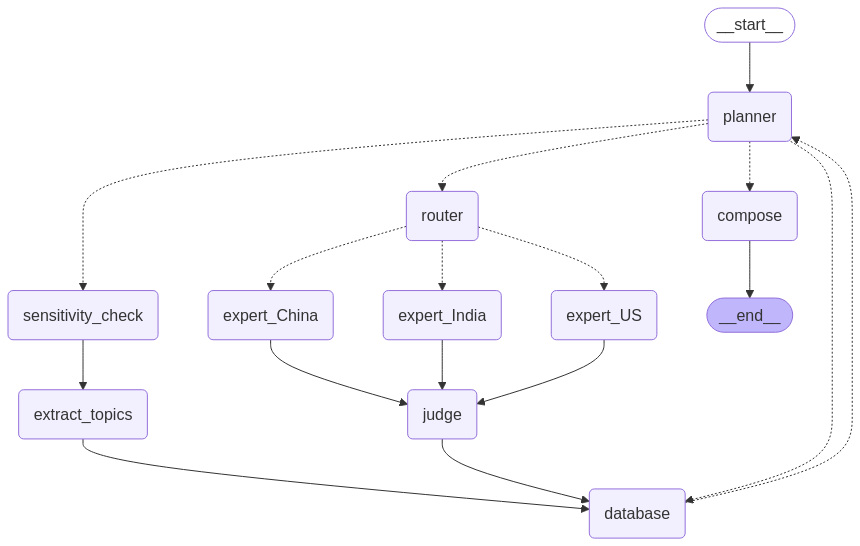

In [48]:
# Display the graph
display(Image(debator1.get_graph().draw_mermaid_png()))

Planner:

Determines if input is culturally sensitive

Extracts sensitive topics

Router:

Chooses which cultures to consult

Conditional Branching:

Only activates relevant cultural experts

Judge:

Aggregates all expert responses

Planner (again):

Receives judgment, prepares structure

Composer:

Generates final answer



Test Case

In [ ]:
state = {
    "question_meta": {
        "original": "What are the gender roles in different cultures?"
    },
    "user_profile": {
        "id": "user_001",
        "demographics": {
            "age": 30,
            "location": "UK",
            "gender": "female"
        },
        "preferences": {
            "language": "English"
        }
    },
    "response_state": {
        "expert_responses": []
    },
    "full_history": []
}


In [ ]:

result = debator1.invoke(
    state,
    config={
        "recursion_limit": 200,  # Your existing config
        "configurable": {  # Add configurable block
            "thread_id": "1",  # Provide a thread ID
            # Optionally provide checkpoint_ns or checkpoint_id
            # "checkpoint_ns": "your_namespace",
            # "checkpoint_id": "your_checkpoint_id"
        }
    }
)